#%% [markdown]
# # キャンドルチャート
# まずはインポート

In [ ]:
import math
import eikon as ek  # the Eikon Python wrapper package
ek.set_app_key('0ed6a35e0937415eab446d3375bca7cf671d6b4c')
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
import scipy.optimize as sco  # optimization routines
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [4]:
cf.set_config_file(offline=True, theme="white")
#Font Setting
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath= 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath= '/System/Library/Fonts/ヒラノギ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath= '/usr/share/fonts/truetype/takao-gothic/TakaoExGothic.ttc'
jpfont = FontProperties(fname = FontPath)

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl_dirpath = os.path.dirname(mpl.__file__)
# デフォルトの設定ファイルのパス
default_config_path = os.path.join(mpl_dirpath, 'mpl-data', 'matplotlibrc')
# カスタム設定ファイルのパス
custom_config_path = os.path.join(mpl.get_configdir(), 'matplotlibrc')

In [6]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
import datetime 

In [7]:
rics = [
    'US10YT=RR',  # Apple stock
    '.SPX',
    'JP10YT=RR',  # Amazon stock
    '.N225',
    'DE10YT=RR', 
    '.DAX',
    'CLc1',  # Gold ETF
    'JPY='  # USD/JPY exchange rate
]
type(rics)

list

In [8]:
meigara =[
    ('US10YT=RR','米国10年債(%)'),  # Apple stock
    ('.SPX','S&P500($)'),
    ('JP10YT=RR','日本10年債(%)'),  # Amazon stock
    ('.N225','日経平均(円)',),
    ('DE10YT=RR','ドイツ10年債(%)'), 
    ('.DAX','DAX(€)'),
    ('CLc1','WTI原油先物($/BBL)'),  # Gold ETF
    ('JPY=','ドル円')  # USD/JPY exchange rate
]


In [13]:
fields=[
    'Open',
    'High',
    'Low',
    'Close'
]


In [14]:
now = datetime.datetime.today()
now.date()


datetime.date(2020, 6, 16)

In [15]:
delta = datetime.timedelta(weeks=5)
sdate = now.date()-delta

In [16]:
sdate

datetime.date(2020, 5, 12)

In [17]:
data = ek.get_timeseries(rics,  # the RICs
                         fields=fields,  # the required fields
                         start_date=sdate.strftime('%Y-%m-%d'),  # start date
                         end_date=now.date().strftime('%Y-%m-%d'))  # end date

In [18]:
data=data.iloc[:-1]

#%% [markdown]
#　Plotlyで描画してみる


In [19]:
from plotly import tools


In [20]:
import plotly.offline as po
import plotly.io as pio

#%% [markdown]
##個別に出力する


In [17]:
for v,char in meigara:
    fig = go.Figure(data=[go.Candlestick(x=data.index,
                    open=data[v]['OPEN'],
                    high=data[v]['HIGH'],
                    low=data[v]['LOW'],
                    close=data[v]['CLOSE'])],
    )
    fig.layout.update({'title':char})
    fig.update_xaxes(
        rangeslider_visible=False,
        rangeselector=dict(
            buttons=list([
                dict(count=1,label='1m',step='month',stepmode='backward'),
                dict(count=6,label='6m',step='month',stepmode='backward'),
                dict(count=1,label='YTD',step='year',stepmode='todate'),
                dict(count=1,label='1y',step='year',stepmode='backward'),
                dict(step='all')
            ])
        ),        
        rangebreaks=[
            dict(pattern='day of week',bounds=[6,1])
        ]
    )
    po.plot(fig ,filename=v+'.html')
    pio.write_image(fig,v+'.pdf')

In [18]:
data.head()


Security   US10YT=RR                          .SPX                             \
Field           OPEN   HIGH    LOW  CLOSE     OPEN     HIGH      LOW    CLOSE   
Date                                                                            
2020-05-12     0.711  0.726  0.660  0.679  2939.50  2945.82  2869.59  2870.12   
2020-05-13     0.669  0.674  0.635  0.651  2865.86  2874.14  2793.15  2820.00   
2020-05-14     0.644  0.646  0.604  0.619  2794.54  2852.80  2766.64  2852.50   
2020-05-15     0.627  0.649  0.590  0.640  2829.95  2865.01  2816.78  2863.70   
2020-05-18     0.641  0.744  0.636  0.742  2913.86  2968.09  2913.86  2953.91   

Security   JP10YT=RR         ...      .DAX             CLc1                \
Field           OPEN   HIGH  ...       LOW     CLOSE   OPEN   HIGH    LOW   
Date                         ...                                            
2020-05-12     0.011  0.012  ...  10772.58  10819.50  24.49  26.23  24.22   
2020-05-13    -0.004  0.000  ...  10530.32  10542.66  25.30  26.45  24.79   
2020-05-14    -0.004  0.001  ...  10160.89  10337.02  25.56  27.96  25.18   
2020-05-15     0.000  0.001  ...  10382.54  10465.17  27.64  29.92  27.24   
2020-05-18     0.001  0.002  ...  10677.52  11058.87  29.53  33.32  29.53   

Security             JPY=                          
Field       CLOSE    OPEN    HIGH     LOW   CLOSE  
Date                                               
2020-05-12  25.78  107.67  107.69  107.11  107.13  
2020-05-13  25.29  107.09  107.27  106.72  107.02  
2020-05-14  27.56  107.02  107.36  106.76  107.24  
2020-05-15  29.43  107.24  107.43  106.84  107.02  
2020-05-18  31.82  107.07  107.50  107.02  107.33  

[5 rows x 32 columns]

In [19]:
data.index = data.index.date


In [20]:
from plotly.subplots import make_subplots


In [28]:
data

Security   US10YT=RR                          .SPX                             \
Field           OPEN   HIGH    LOW  CLOSE     OPEN     HIGH      LOW    CLOSE   
Date                                                                            
2020-05-12     0.711  0.726  0.660  0.679  2939.50  2945.82  2869.59  2870.12   
2020-05-13     0.669  0.674  0.635  0.651  2865.86  2874.14  2793.15  2820.00   
2020-05-14     0.644  0.646  0.604  0.619  2794.54  2852.80  2766.64  2852.50   
2020-05-15     0.627  0.649  0.590  0.640  2829.95  2865.01  2816.78  2863.70   
2020-05-18     0.641  0.744  0.636  0.742  2913.86  2968.09  2913.86  2953.91   
2020-05-19     0.726  0.745  0.688  0.711  2948.59  2964.21  2922.35  2922.94   
2020-05-20     0.687  0.721  0.670  0.679  2953.63  2980.29  2953.63  2971.61   
2020-05-21     0.677  0.682  0.654  0.677  2969.95  2978.50  2938.57  2948.51   
2020-05-22     0.670  0.674  0.627  0.659  2948.05  2956.76  2933.59  2955.45   
2020-05-25       NaN    NaN    NaN    NaN      NaN      NaN      NaN      NaN   
2020-05-26     0.656  0.708  0.654  0.698  3004.08  3021.72  2988.17  2991.77   
2020-05-27     0.690  0.729  0.661  0.677  3015.65  3036.25  2969.75  3036.13   
2020-05-28     0.693  0.713  0.670  0.705  3046.61  3068.67  3023.40  3029.73   
2020-05-29     0.683  0.687  0.643  0.644  3025.17  3049.17  2998.61  3044.31   
2020-06-01     0.640  0.687  0.638  0.662  3038.78  3062.18  3031.54  3055.73   
2020-06-02     0.649  0.688  0.648  0.680  3064.78  3081.07  3051.64  3080.82   
2020-06-03     0.692  0.771  0.685  0.761  3098.90  3130.94  3098.90  3122.87   
2020-06-04     0.756  0.828  0.736  0.820  3111.56  3128.91  3090.41  3112.35   
2020-06-05     0.817  0.959  0.799  0.905  3163.84  3211.72  3163.84  3193.93   
2020-06-08     0.902  0.932  0.862  0.884  3199.92  3233.13  3196.00  3232.39   
2020-06-09     0.872  0.872  0.802  0.829  3213.32  3222.71  3193.11  3207.18   
2020-06-10     0.824  0.834  0.726  0.748  3213.42  3223.27  3181.49  3190.14   
2020-06-11     0.720  0.730  0.649  0.653  3123.53  3123.53  2999.49  3002.10   
2020-06-12     0.677  0.721  0.664  0.699  3071.04  3088.42  2984.47  3041.31   
2020-06-15     0.666  0.723  0.653  0.702  2993.76  3079.76  2965.66  3066.59   

Security   JP10YT=RR         ...      .DAX             CLc1                \
Field           OPEN   HIGH  ...       LOW     CLOSE   OPEN   HIGH    LOW   
Date                         ...                                            
2020-05-12     0.011  0.012  ...  10772.58  10819.50  24.49  26.23  24.22   
2020-05-13    -0.004  0.000  ...  10530.32  10542.66  25.30  26.45  24.79   
2020-05-14    -0.004  0.001  ...  10160.89  10337.02  25.56  27.96  25.18   
2020-05-15     0.000  0.001  ...  10382.54  10465.17  27.64  29.92  27.24   
2020-05-18     0.001  0.002  ...  10677.52  11058.87  29.53  33.32  29.53   
2020-05-19     0.002  0.006  ...  10936.07  11075.29  32.83  33.44  31.34   
2020-05-20     0.002  0.003  ...  10978.57  11223.71  31.89  33.78  31.56   
2020-05-21     0.002  0.002  ...  11036.91  11065.93  33.53  34.66  33.26   
2020-05-22     0.001  0.001  ...  10867.17  11073.87  33.95  34.00  30.72   
2020-05-25    -0.001  0.005  ...  11118.12  11391.28    NaN    NaN    NaN   
2020-05-26     0.006  0.006  ...  11429.88  11504.65  33.30  34.81  32.48   
2020-05-27     0.008  0.009  ...  11519.77  11657.69  34.14  34.32  31.75   
2020-05-28     0.000  0.002  ...  11654.83  11781.13  32.10  34.21  31.14   
2020-05-29     0.005  0.008  ...  11575.74  11586.85  33.68  35.77  32.36   
2020-06-01     0.006  0.009  ...       NaN       NaN  35.21  35.90  34.27   
2020-06-02     0.015  0.015  ...  11850.34  12021.28  35.56  37.06  35.28   
2020-06-03     0.011  0.016  ...  12133.70  12487.36  36.86  38.18  35.88   
2020-06-04     0.022  0.033  ...  12326.44  12430.56  36.76  37.62  36.38   
2020-06-05     0.037  0.049  ...  12560.19  12847.68  37.33  39.68  37.05   
2020-06-08     0.053  0.055  ...  126

#%% [markdown]
##一緒に出力する、、、レンジスライダーが最初しか削除できない、、、バグなのか！？



In [35]:
# make trace
from plotly.subplots import make_subplots

title =[
   '米国10年債(%)',  # Apple stock
    'S&P500($)',
    '日本10年債(%)',  # Amazon stock
    '日経平均(円)',
    'ドイツ10年債(%)', 
    'DAX(€)',
    'WTI原油先物($/BBL)',  # Gold ETF
    'ドル円'  # USD/JPY exchange rate
]
fig = make_subplots(rows=4, cols=2,    
                    shared_xaxes=True,
                    vertical_spacing=0.15,
                    subplot_titles=(title)
)
for k,(v,char) in enumerate(zip(rics,title)):
    trace = go.Candlestick(
                    x=data.index,
                    open=data[v]['OPEN'],
                    high=data[v]['HIGH'],
                    low=data[v]['LOW'],
                    close=data[v]['CLOSE'],
                    name=char,
                    meta={'rangeselector':False}
                    )
    fig.update_layout(xaxis_rangeslider_visible=False)
    #                         ],
    #                 )
    # trace.layout.update({'title':char})
    # trace.update_xaxes(
    #     rangeslider_visible=True,
    #       rangebreaks=[
    #         dict(pattern='day of week',bounds=[6,1])
    #     ]
    # ) 
    fig.append_trace(trace,divmod(k,2)[0]+1,divmod(k,2)[1]+1)


fig.update_layout(
    height=1900,
    showlegend=False,
    title_text='Look Back a week'
)

po.plot(fig ,filename=v+'.html')


'JPY=.html'

#%% [markdown]
##　mplfinanceをつかってmatplotlibベースで描画してみる。

#%% [markdown]
## FIELD値をわざわざ次の形式にしないとだめ。（mpf.plot(df,,,)の形式で描画できなくなる。）

In [21]:
conv_f=['Open','High','Low','Close']

In [22]:
type(conv_f)

list

In [23]:
import itertools
import mplfinance as mpf

In [29]:
list(itertools.product(rics,conv_f))
columns= pd.MultiIndex.from_product([rics,conv_f])

In [30]:
    data.columns=columns

In [41]:
titles= ['米国10年債(%)','S&P500($)','日本10年債(%)','日経平均(円)',
            'ドイツ10年債(%)','DAX(€)','WTI原油先物($/BBL)','ドル円']

In [77]:
mpf.available_styles()
kwargs = dict(type='candle',mav=(5),volume=False,figratio=(10,7),figscale=1.8)

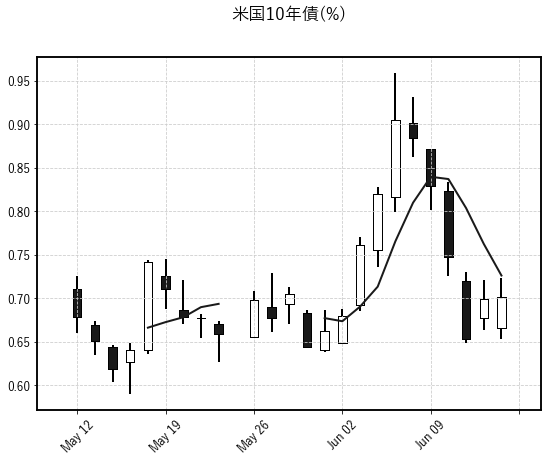

IndexError: list assignment index out of range

In [65]:

for i,(v,a) in enumerate(zip(rics,titles)):
   mpf.plot(data.loc[:,v],**kwargs,style='classic',title='%s'%a)

In [86]:
fig, axes = plt.subplots(4, 2, figsize=(12,16))

for i,(v,a) in enumerate(zip(rics,titles)):
    for j in range(2):
        mpf.axplot(ax=ax[i][j],data.loc[:,v],**kwargs,style='classic',title='%s'%a)

SyntaxError: positional argument follows keyword argument (<ipython-input-86-e21bb41f4f16>, line 5)

#%% [markdown]
# # キャンドルチャート
# グラフを画像として集めてきくる。

In [43]:

import io
from PIL import Image

# im = Image.open('tight.png')

def plotimg(im):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    ax.imshow(im)
    plt.show()

In [ ]:
ploting

In [44]:

plots = []
for p in range(8):
    plots.append(io.BytesIO())

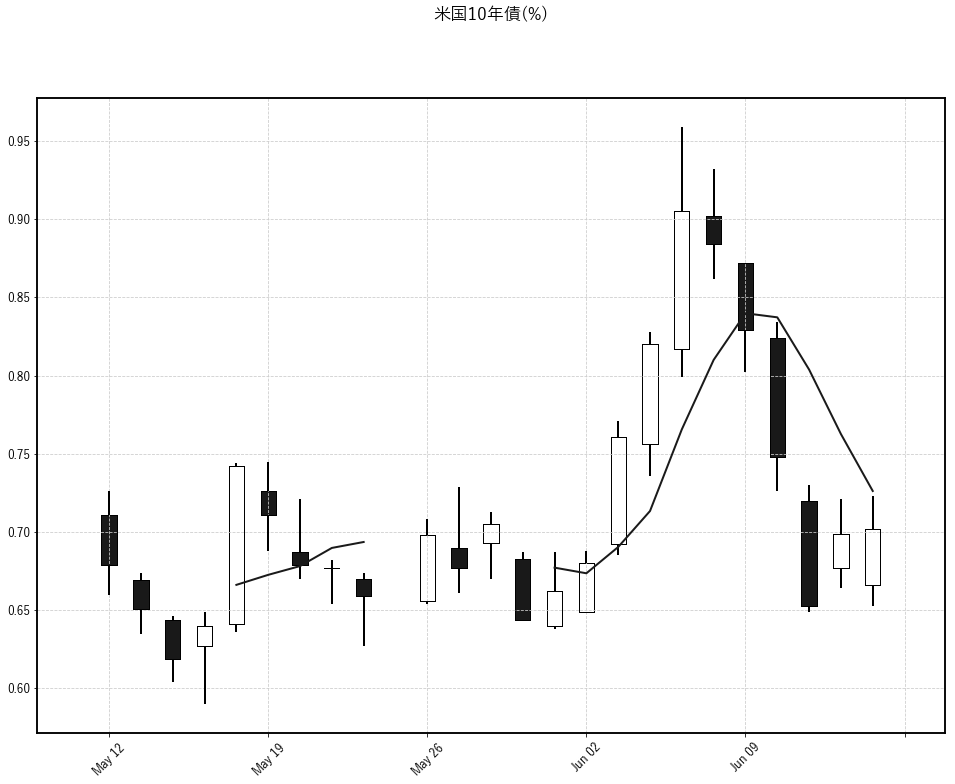

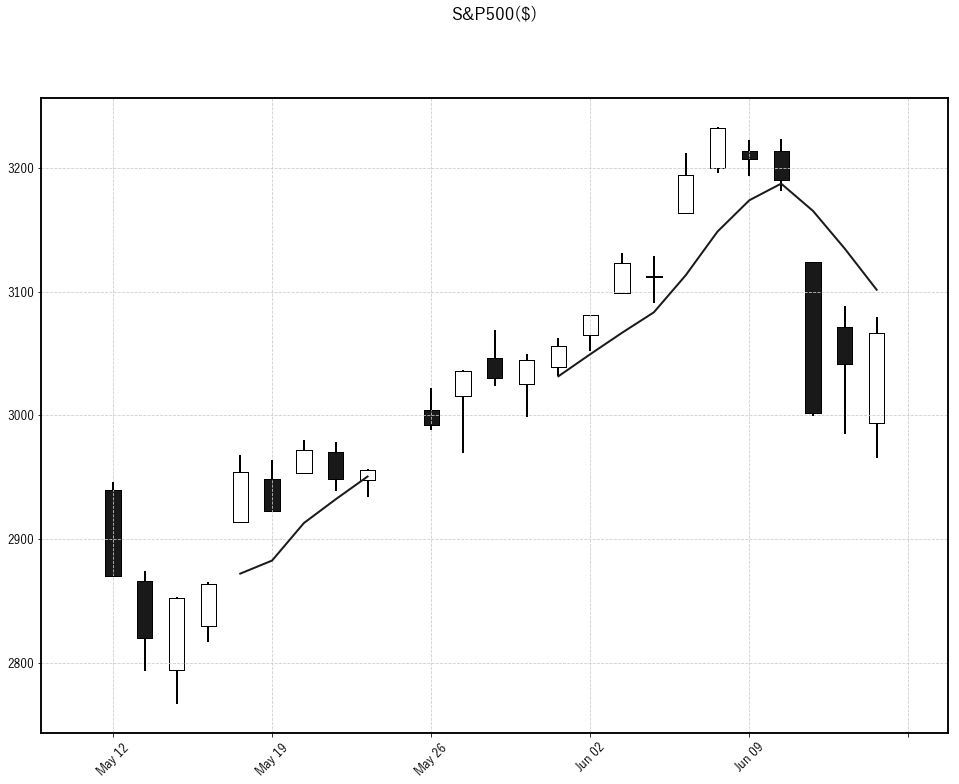

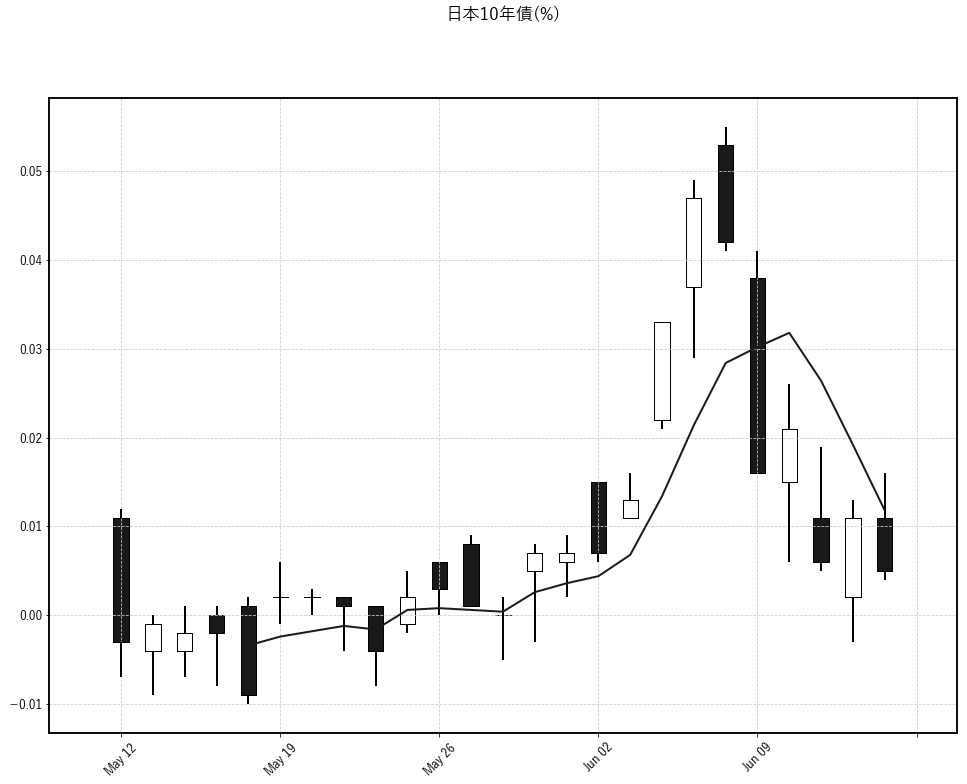

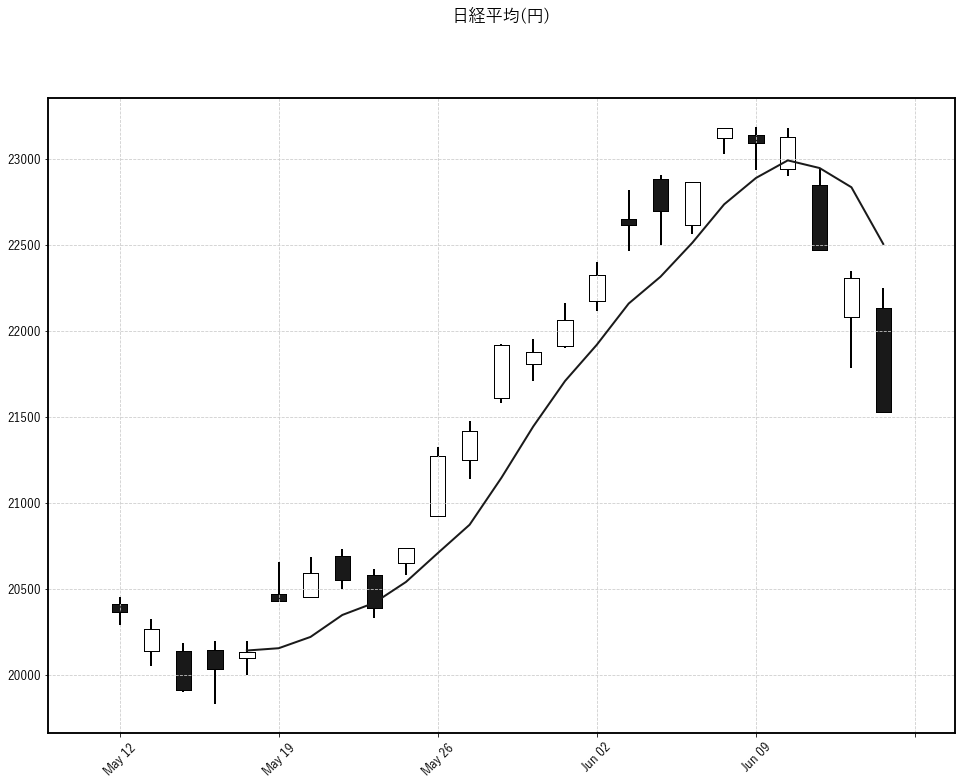

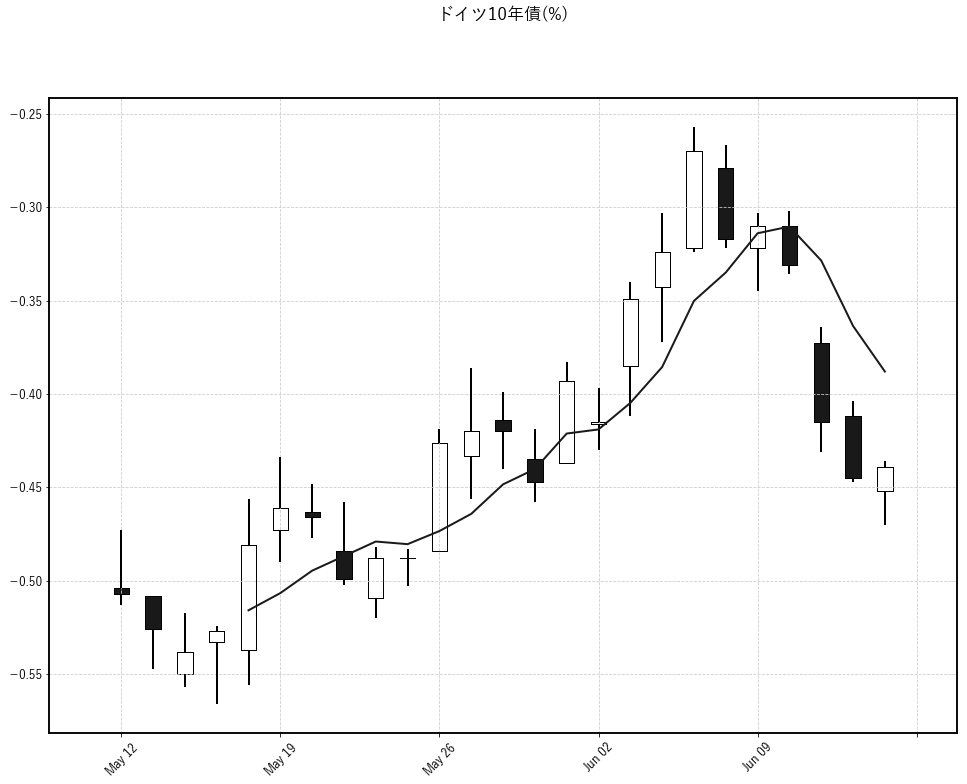

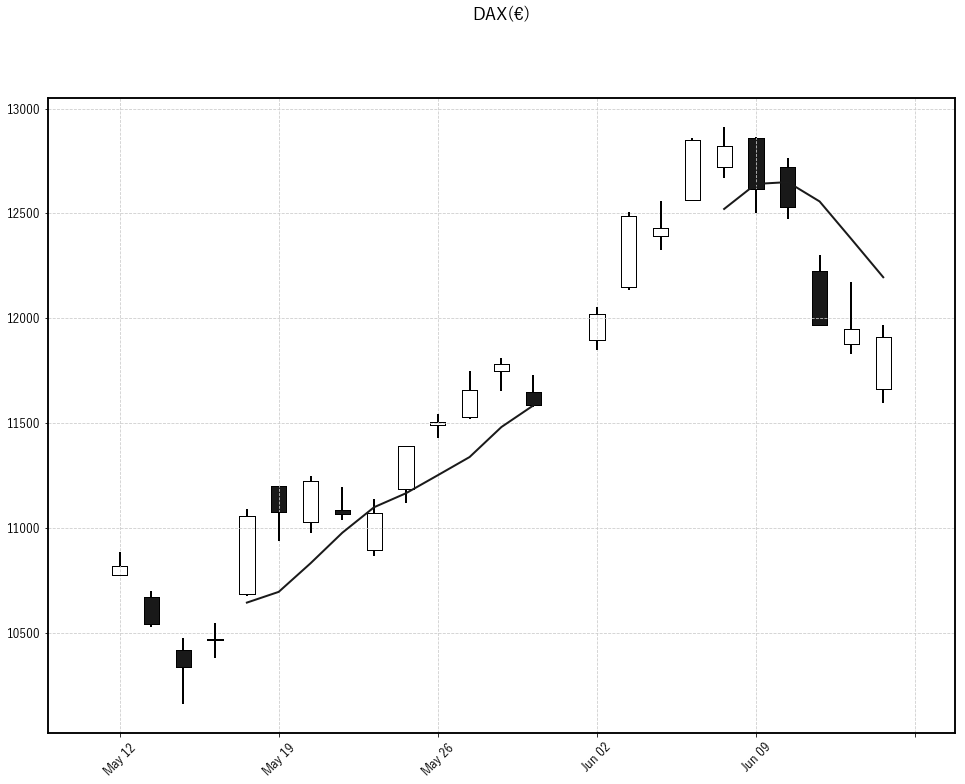

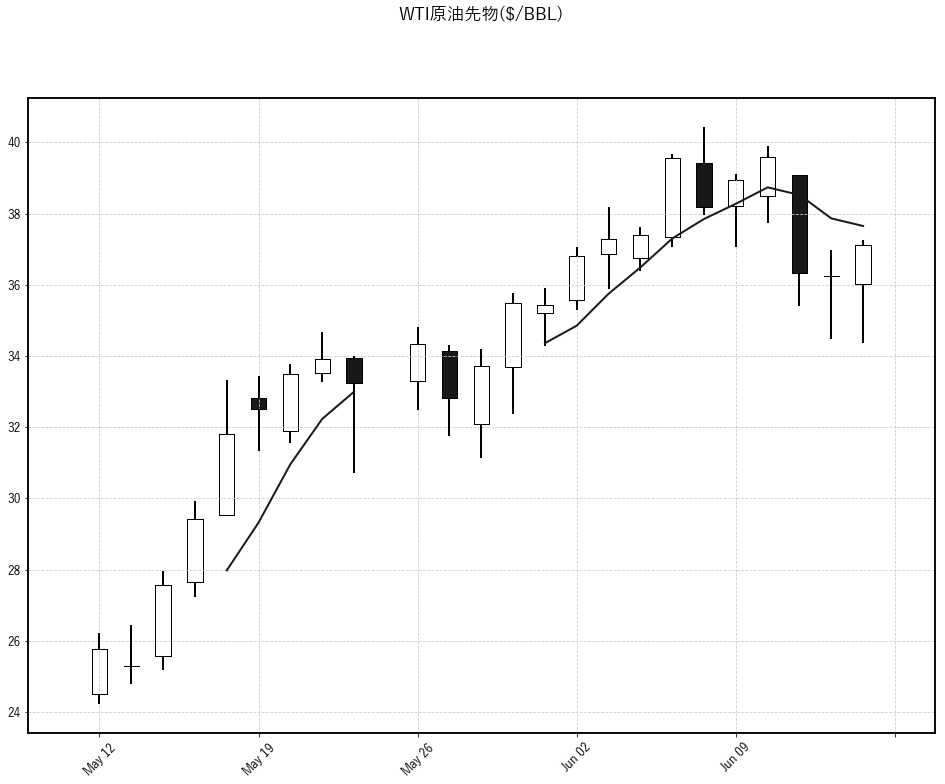

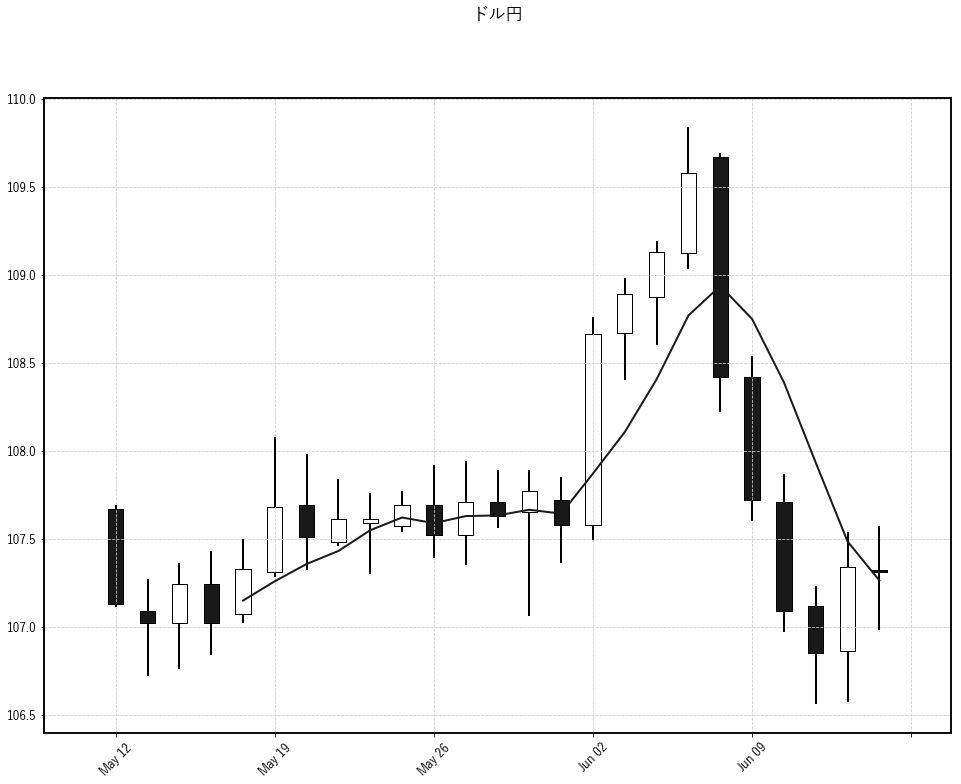

In [78]:
for i,(v,a) in enumerate(zip(rics,titles)):
   mpf.plot(data.loc[:,v],savefig=plots[i],**kwargs,style='classic',title='%s'%a)

In [71]:
%%capture
fig, ax = plt.subplots(4,2,figsize=(50,70))

In [72]:
axes = [x for sub in ax for x in sub ]
axes

In [82]:
for ix,p in enumerate(plots):
    p.seek(0)
    im = Image.open(p)
    ax = axes[ix]
    ax.set_axis_off()
    ax.imshow(im,'Border','tight')

ValueError: 'norm' must be an instance of 'mcolors.Normalize'

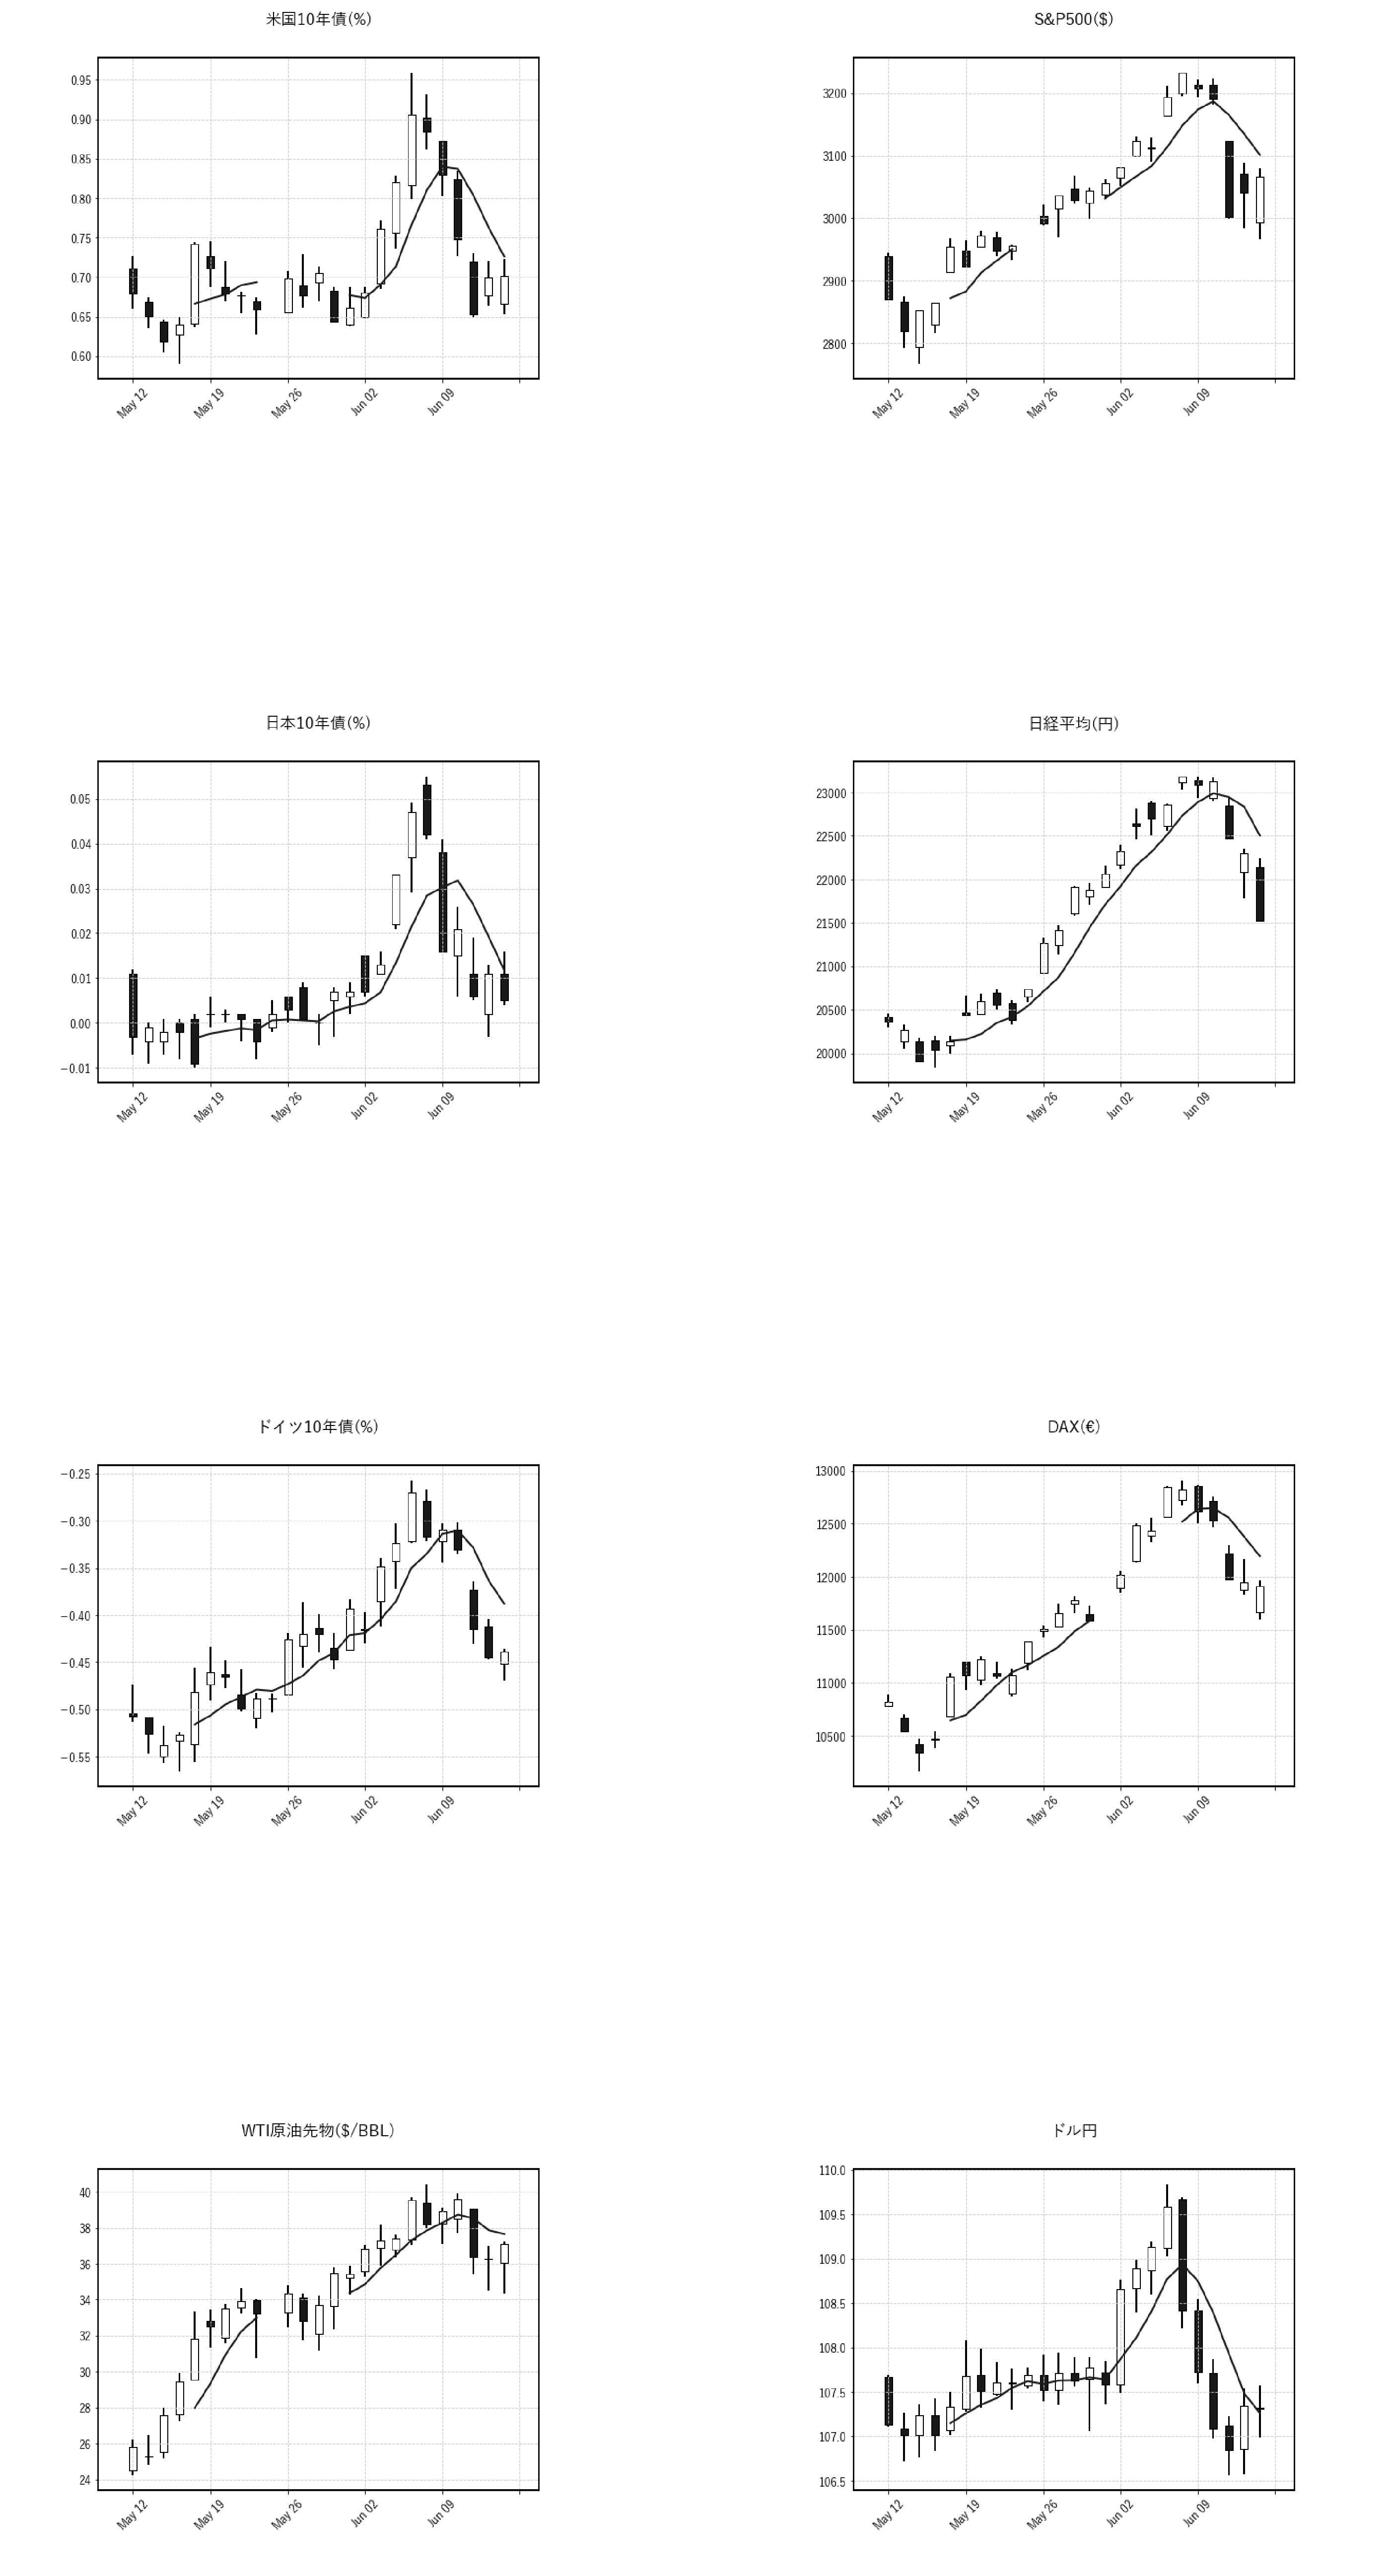

In [80]:

fig

In [ ]:
def get_concat_h_multi_blank(im_list):
    _im = im_list.pop(0)
    for im in im_list:
        _im = get_concat_h_blank(_im, im)
    return _im

get_concat_h_multi_blank([im1, im2, im1])

In [24]:
import xlwings as xw

In [25]:
wb = xw.Book()

In [215]:
xw.Range('A1').value = data

In [211]:
ax[0,0].mpf.plot(data.loc[:,'.spx'],type='candle')

AttributeError: 'AxesSubplot' object has no attribute 'mpf'

In [ ]:
xw.sheets.active.pictures.add(fig,name='')

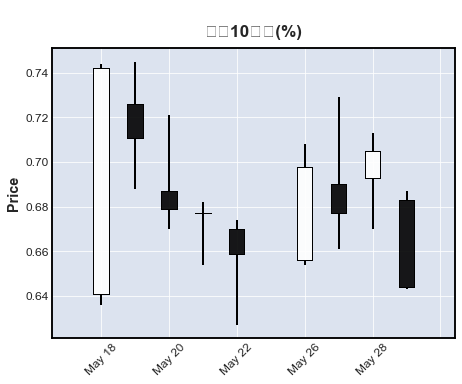

TypeError: Don't know what to do with that image object

In [229]:
for (v,a) in zip(rics_p,print_ric):
    # mpf.plot(data.loc[:,v],type='candle',title='\n%s'%a)
    xw.sheets.active.pictures.add(mpf.plot(data.loc[:,v],type='candle',title='\n%s'%a),name=a,update=True)
    

In [126]:
index =pd.MultiIndex.from_product([rics,fields],names=['Security', 'Field'])

In [128]:
index

MultiIndex([('US10YT=RR',   'High'),
            ('US10YT=RR',    'Low'),
            ('US10YT=RR',   'Open'),
            ('US10YT=RR',  'Close'),
            ('US10YT=RR', 'Volume'),
            ('JP10YT=RR',   'High'),
            ('JP10YT=RR',    'Low'),
            ('JP10YT=RR',   'Open'),
            ('JP10YT=RR',  'Close'),
            ('JP10YT=RR', 'Volume'),
            ('DE10YT=RR',   'High'),
            ('DE10YT=RR',    'Low'),
            ('DE10YT=RR',   'Open'),
            ('DE10YT=RR',  'Close'),
            ('DE10YT=RR', 'Volume'),
            (     'CLc1',   'High'),
            (     'CLc1',    'Low'),
            (     'CLc1',   'Open'),
            (     'CLc1',  'Close'),
            (     'CLc1', 'Volume'),
            (      'GLD',   'High'),
            (      'GLD',    'Low'),
            (      'GLD',   'Open'),
            (      'GLD',  'Close'),
            (      'GLD', 'Volume'),
            (     'JPY=',   'High'),
            (     'JPY=',    'Low'),
 

In [138]:
data.reset_index()

AttributeError: 'DataFrame' object has no attribute 'reset_columns'

In [ ]:
F_curv = ek.get_data('0#CL:', fields=['CF_DATE', 'CF_LAST',
                                      'CF_VOLUME','CONTR_MNTH' ,'SETTLEDATE'],)

In [ ]:
FFcurve = ek.get_data(['0#CL:'], ['RECORDTYPE'])


In [ ]:
list(FFcurve[0]['Instrument'].iloc[:24])

In [ ]:

data = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:13]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-1-01',  # start date
                         end_date='2020-05-11',
                         interval='weekly')  # end date

In [ ]:
data

In [ ]:
data.columns = range(len(data.columns))

In [ ]:
cols = [4,19,21,22]
F_CL_Curv_3=data.dropna(how='all').T.iloc[:,cols]

In [ ]:
GenS=data.T.iloc[['0','1','7','12']]
GenS.T

In [89]:
Sp_g=make_Spread(GenS.T,0)

In [9]:
 F_CL_Curv_3.columns=['2020/1/3','2020/4/17','2020/5/1','2020/5/8']

In [10]:
color={'2020/1/3':'black','2020/4/17':'#607D8B','2020/5/1':'#9E9E9E','2020/5/8':'#B0BEC5'}
width ={'2020/1/3':4,'2020/4/17':2,'2020/5/1':2,'2020/5/8':5}
dash={'2020/1/3':'solid','2020/4/17':'dot','2020/5/1':'dot','2020/5/8':'solid'}


In [14]:
F_CL_Curv_3.iplot(yTitle='USD/Bbl',xTitle=('期先月数'),
                    colors=color,
                    width=width,
                    dash=dash,
                    legend =dict(x=0.8,y=0)
                )

In [16]:
F_CL_Curv_3.iloc[:,1::2].iplot()

In [17]:
data2 = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:24]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-11-01',  # start date
                         end_date='2020-05-11',
                         interval='monthly')  # end date

In [22]:
data4 = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:24]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2019-12-15',  # start date
                         end_date='2020-05-11',
                         interval='daily')  # end date

In [22]:
rics =['CLc1']
data4 = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:24]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2019-12-15',  # start date
                         end_date='2020-05-11',
                         interval='daily')  # end date

In [24]:
CLc1_c2 = data4.dropna(how='any').iloc[:,:2]
CLc1_c2

CLOSE,CLM0,CLN0
Date,,
2019-12-16,58.56,58.08
2019-12-17,59.09,58.56
2019-12-18,59.18,58.63
2019-12-19,59.43,58.85
2019-12-20,59.07,58.54
...,...,...
2020-05-05,24.56,26.49
2020-05-06,23.99,25.62
2020-05-07,23.55,24.83


In [ ]:
Sp_g= make_Spread()

In [25]:
CLc1_c2.iplot()

In [137]:
data2.T.iplot()

In [38]:
data2.iloc[:,:5]

NameError: name 'data2' is not defined

In [122]:
col = range(1,len(data2.columns))
data2.columns = range(len(data2.columns))

In [70]:
def make_Spread(data,kijun_no):
    cols =[]
    df = pd.DataFrame(data.iloc[:,kijun_no])
    for lag in range(1, len(data.columns)):
        col = 'spread_{}'.format(lag)  # defines the column name
        df[col] = data.iloc[:,kijun_no]-data.iloc[:,kijun_no+lag]  # creates the lagged data column
        cols.append(col)  # stores the column name
    df.dropna(inplace=True)  # gets rid of incomplete data rows
    return df, cols

In [96]:
Sp_G = Sp_g[0].iloc[:,1:]
Sp_G.columns=['1月先','6月先','12月先']
Sp_G.iplot(yTitle='USD/Bbl',
                            colors={'1月先':'black','6月先':'#607D8B','12月先':'#9E9E9E'},
                            width={'1月先':3,'6月先':1,'12月先':3},
                            dash={'1月先':'solid','6月先':'solid','12月先':'dot'},
                            fontsize=100,
                            legend =dict(x=0,y=1)
                            )

In [94]:
Spread = CLZ1['/CLM0'] - CLZ1['/CLZ1']

In [95]:
Spread

Date
2015-12-31    -1.43
2016-01-31    -1.46
2016-02-29    -1.47
2016-03-31    -1.40
2016-04-30    -1.36
2016-05-31    -1.80
2016-06-30    -1.20
2016-07-31    -1.55
2016-08-31    -1.41
2016-09-30    -1.60
2016-10-31    -1.28
2016-11-30    -1.25
2016-12-31    -0.28
2017-01-31    -0.36
2017-02-28    -0.40
2017-03-31    -1.08
2017-04-30    -1.22
2017-05-31    -1.42
2017-06-30    -1.95
2017-07-31    -1.60
2017-08-31    -1.42
2017-09-30    -0.18
2017-10-31     0.51
2017-11-30     1.16
2017-12-31     1.94
2018-01-31     2.56
2018-02-28     2.06
2018-03-31     3.21
2018-04-30     4.52
2018-05-31     3.69
2018-06-30     4.36
2018-07-31     3.83
2018-08-31     4.44
2018-09-30     5.28
2018-10-31     3.83
2018-11-30    -0.13
2018-12-31    -1.78
2019-01-31     1.11
2019-02-28     2.72
2019-03-31     3.42
2019-04-30     4.67
2019-05-31     1.49
2019-06-30     2.44
2019-07-31     3.71
2019-08-31     2.37
2019-09-30     1.80
2019-10-31     2.48
2019-11-30     3.43
2019-12-31     6.37
2020-01-31     

In [134]:
def make_Spread(data,kijun_no):
    cols =[]
    df = pd.DataFrame(data.iloc[:,kijun_no])
    for lag in range(1, len(data.columns)):
        col = 'spread_{}'.format(lag)  # defines the column name
        df[col] = data.iloc[:,kijun_no]-data.iloc[:,kijun_no+lag]  # creates the lagged data column
        cols.append(col)  # stores the column name
    df.dropna(inplace=True)  # gets rid of incomplete data rows
    return df, cols

In [135]:
Spread = make_Spread(data2,0)

In [152]:
rics =[
    'CLc1',
    'LCOc1',
    'OQc1'
]
OIL_d = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-12-01',  # start date
                         end_date='2020-05-11',
                         interval='daily')  # end date

In [150]:
OIL_m = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-12-01',  # start date
                         end_date='2020-05-11',
                         interval='monthly')  # end date

In [153]:
OIL_d.columns=['WTI','ICEブレント','ドバイ原油']
OIL_m.columns=['WTI','ICEブレント','ドバイ原油']


In [160]:
OIL_m.dropna(how='any').plot(yTitle='USD/Bbl')

AttributeError: 'Line2D' object has no property 'ytitle'

In [185]:
OIL_m.dropna(how='any').iplot(yTitle='USD/Bbl',
                            colors={'WTI':'black','ICEブレント':'#607D8B','ドバイ原油':'#9E9E9E'},
                            width={'WTI':3,'ICEブレント':1,'ドバイ原油':3},
                            dash={'WTI':'solid','ICEブレント':'solid','ドバイ原油':'dot'},
                            legend =dict(x=0,y=1)
                            )


In [204]:
OIL_d.dropna(how='any').iplot(yTitle='USD/Bbl',
                            colors={'WTI':'black','ICEブレント':'#607D8B','ドバイ原油':'#9E9E9E'},
                            width={'WTI':3,'ICEブレント':1,'ドバイ原油':3},
                            dash={'WTI':'solid','ICEブレント':'solid','ドバイ原油':'dot'},
                            legend =dict(x=0.01,y=0.01)
                            )

In [183]:
import plotly.graph_objects as go
fig = go.Figure()

In [184]:
fig.add_trace(go.iplot(OIL_d.dropna(how='any')))

AttributeError: module 'plotly.graph_objects' has no attribute 'iplot'

In [28]:
rics =[
    'CLc1',
    'CLc2'
]
OIL_Gensp = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2020-3-30',  # start date
                         end_date='2020-4-22',
                         interval='daily')  # end date

In [35]:
OIL_Gensp.columns =['4月限','5月限']
OIL_Gensp.iplot(yTitle='USD/Bbl',
                            colors={'4月限':'black','5月限':'gray'},
                            width={'4月限':2,'5月限':4},
                            dash={'4月限':'solid','5月限':'dot'},
                            legend =dict(x=0,y=0))

In [37]:
OIL_Gensp.iplot(yTitle='USD/Bbl',
                            colors={'4月限':'black','5月限':'gray'},
                            width={'4月限':2,'5月限':4},
                            dash={'4月限':'solid','5月限':'dot'},
                            legend =dict(x=0,y=0),
                            subplots=True,shape=(2,1),shared_xaxes=True)

In [112]:
rics=['C-STKOKL-2-EIA','C-STK-T-EIA','CLc1']

In [113]:
Cussing = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2004-01-01',  # start date
                         end_date='2020-05-18',
                         interval='monthly')  # end date

In [114]:
Cussing.to_excel('C://Users//KOSUKE//Desktop//upload//WTI//cus2.xlsx')

In [109]:
layout.yaxis

NameError: name 'layout' is not defined

In [23]:
Path = os.getcwd()

In [24]:
cpi = pd.read_excel(Path+'\\cpi.xlsx',sheet_name = 'cpi',header =3,date_parser=1,index_col=0)


In [26]:
cpi.dropna(how='any',inplace = True)
col_all=['All items','Food','Housing','Fuel, light & water charges','Furniture & household utensils','Transpor- tation & communi- cation','Recre- ational durable goods',
'Medical care',
'Transpor- tation & communi- cation',
'Culture & recreation',
'Miscella- neous',
]


In [57]:
cpi[col_lessFFood].iplot()

In [25]:
col_lessFFood=['All items, less fresh food','Food, less fresh food ','Housing','Fuel, light & water charges','Furniture & household utensils','Transpor- tation & communi- cation','Recre- ational durable goods',
'Medical care',
'Transpor- tation & communi- cation',
'Culture & recreation',
'Miscella- neous',
]
cpi_lessFFood = cpi[col_lessFFood]

In [20]:
weight = pd.read_excel(Path+'\\cpi.xlsx',sheet_name = 'weight',header =3,index_col=0)

In [33]:
weight.dropna(how='any',inplace = True)
weight_lessFFood=weight[col_lessFFood]

In [34]:
weight_lessFFood

,All items,"All items, less fresh food","Food, less fresh food",Housing,"Fuel, light & water charges",Furniture & household utensils,Transpor- tation & communi- cation,Recre- ational durable goods,Medical care,Transpor- tation & communi- cation,Culture & recreation,Miscella- neous,Energy,Expenses for education,Expenses for culture & recreation,Expenses for information & communi-cation
ウエイト\n(平成27年指数以降),10000,9586,2209,2087,745,348,1476,59,430,1476,989,574,784,400,1085,476
品目数\n(平成27年指数以降),585,523,173,20,6,48,43,11,29,43,79,44,5,27,82,7


In [37]:
weight_lessFFood.iloc[0,2:].sum()

13138

In [ ]:
col_all=['All items','Food','Housing','Fuel, light & water charges','Furniture & household utensils','Transpor- tation & communi- cation','Recre- ational durable goods',
'Medical care',
'Transpor- tation & communi- cation',
'Culture & recreation',
'Miscella- neous',
'Energy','Expenses for education','Expenses for culture & recreation','Expenses for information & communi-cation'
]

In [31]:
cpi_ene = cpi['Energy']
type(cpi_ene)

pandas.core.series.Series

In [52]:
data2 = ek.get_timeseries(['CLc1','JPY='],  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='1990-11-01',  # start date
                         end_date='2020-05-11',
                         interval='weekly')  # end date

In [55]:
data2.head()

CLOSE,CLc1,JPY=
Date,,
1991-08-16,21.30,137.35
1991-08-23,21.81,136.85
1991-08-30,22.26,136.78
1991-09-06,21.57,135.55
1991-09-13,21.68,134.00


In [54]:
data2_M = data2.resample('M').mean()

CLOSE,CLc1,JPY=
Date,,
1991-08-31,21.7900,136.993333
1991-09-30,21.8850,134.205000
1991-10-31,23.2400,130.117500
1991-11-30,22.4620,129.744000
1991-12-31,19.3425,127.565000
...,...,...
2020-01-31,57.2760,109.066000
2020-02-29,50.1275,109.775000
2020-03-31,29.2375,107.975000


In [38]:
data_d = ek.get_timeseries(['CLc1','JPY='],  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2020-04-01',  # start date
                         end_date='2020-04-30',
                         interval='daily')  # end 

In [39]:
data_d.describe()

CLOSE,CLc1,JPY=
count,21.000000,22.000000
mean,16.699048,107.778636
std,13.378192,0.657914
min,-37.630000,106.700000
25%,15.060000,107.282500
50%,19.870000,107.665000
75%,22.760000,108.322500
max,28.340000,109.200000


In [41]:
data_d.resample('m').mean()

CLOSE,CLc1,JPY=
Date,,
2020-04-30,16.699048,107.778636
